In [ ]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [ ]:
class Linear(keras.layers.Layer):
  def __init__(self, units= 32, input_dim= 32):
    super(Linear, self).__init__()
    self.w = self.add_weight(shape = (input_dim, units), initializer ="random_normal", trainable = True)
    self.b = self.add_weight(shape = (units,), initializer = "zeros", trainable = True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b


In [ ]:
#make layers and activation in this class
class MLPBlock(keras.layers.Layer):
  def __init__(self):
      super(MLPBlock, self).__init__()
      self.linear_1 = Linear(256, 784 )
      self.linear_2 = Linear(256, 256)
      self.linear_3 = Linear(10, 256)

  def call(self, inputs):
    x = tf.nn.relu(self.linear_1(inputs))
    y= tf.nn.relu(self.linear_2(x))
    z=tf.nn.softmax(self.linear_3(y))
    return z
    

x_train = x_train.reshape((60000,784))
inputs = tf.keras.Input(shape=(784,))
mlp = MLPBlock()
output = mlp(inputs)

In [ ]:
model = keras.Model(inputs=inputs, outputs=output)

In [ ]:
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')


In [ ]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4767 - accuracy: 0.8233
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3523 - accuracy: 0.8684
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8822
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2876 - accuracy: 0.8917
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2679 - accuracy: 0.8979
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2499 - accuracy: 0.9053
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2377 - accuracy: 0.9088
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2231 - accuracy: 0.9141
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2129 - accuracy: 0.9182
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.201

In [ ]:
x_test = x_test.reshape(10000, 784)
x_test.shape
y_test.shape

(10000,)

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.8374 - accuracy: 0.8857
0.8374173045158386 0.885699987411499


In [ ]:
prediction = model.predict([x_test])
print(prediction)

[[1.48604169e-08 1.01775088e-19 8.68291515e-16 ... 1.54849022e-08
  6.16197648e-11 1.00000000e+00]
 [9.36550393e-09 1.10337864e-23 1.00000000e+00 ... 1.12604020e-27
  7.21781162e-21 6.67823864e-28]
 [5.19895851e-34 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.00977894e-32 0.00000000e+00]
 [1.24033138e-21 2.37841612e-25 9.82251193e-20 ... 8.71245838e-13
  2.26265983e-20 4.33281436e-22]]


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker
Coat
Sandal
Sneaker
Dress
Coat
Trouser
Pullover
Pullover
Bag
T-shirt/top
Pullover
Sandal
Sneaker
Sandal
Trouser
Coat
Shirt
Shirt
Ankle boot
Shirt
Bag
Bag
Dress
Dress
Bag
T-shirt/top
Sneaker
Sandal
Sneaker
Ankle boot
T-shirt/top
Trouser
Shirt
Ankle boot
Shirt
Sneaker
Pullover
Trouser
Pullover
Pullover
Coat
Pullover
Sandal
Bag
Coat
Pullover
Bag
Pullover
Bag
T-shirt/top
Sneaker
Sneaker
Bag
Sandal
Trouser
Trouser
Shirt
Coat
Sneaker
Bag
Sneaker
T-shirt/top
Pullover
Shirt
Pullover
Dress
Trouser
Pullover
Bag
Coat
Trouser
Bag
Sandal
Ankle boot
Sandal
T-shirt/top
Dress
Pullover
T-shirt/top
Shirt
Sandal
Dress
Shirt
Sneaker
Trouser
Bag
T-shirt/top
Trouser
Pullover
Pullover
Dress
Shirt
Sneaker
Pullover
Sneaker
Bag
Sandal
Ankle boot
Ankle boot
Coat
Pullover
Sandal
Sneaker
Shirt
Sandal
Pullover
Bag
Shirt
Sneaker
Bag
T-shirt/top
T-shirt/top
Ankle boot
Ankle boot
Dress
T-shirt/top
Bag
Coat
Trouser
Sandal
Coat
Trouser
Ankle boo

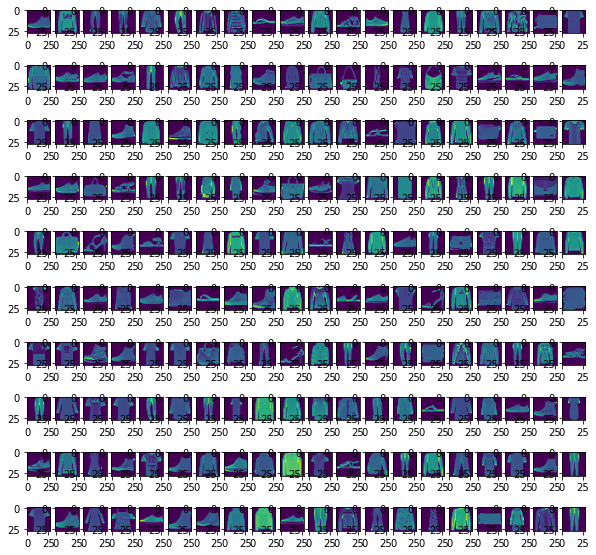

In [ ]:
fig, axes = plt.subplots(10,20, figsize=(10,10))
for i,ax in enumerate(axes.flat):
  num = np.argmax(prediction[i])
  print(class_names[num])
  ax.imshow(x_test.reshape(10000, 28, 28)[i])
